In [1]:
import numpy as np
import pandas as pd

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib qt
plt.ion()

# Descente de Gradient en $D=1$

In [12]:
## On minimise une fonction très simple, ici, une simple parabole
def J(theta):
    return (theta+1)**2

# il faut calculer à la main la dérivée de J, et la taper ici:
def gradient_de_J_par_rapport_a_son_argument(theta):
    return 2*(theta+1) # il faut calculer à la main la dérivée de J, et la taper ici

In [13]:
thetaRange = np.linspace(-3,2,51)
thetaRange


array([-3. , -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. ,
       -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9,
       -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,
        0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,
        1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ])

In [16]:
J(3.0)

16.0

In [17]:
## numpy = NUMerical PYthon

In [20]:
J(np.array([[2,3,13],[2,3,4]]))
## python fait du broadcasting: j'avais pensé J
# comme une fonction de 1 reel
## mais en lui passant un tableau a 1D, il calcule
# pour chaque valeur du tableau et renvoi le tableau

array([[  9,  16, 196],
       [  9,  16,  25]])

In [23]:
theta0 = 2 # valeur initiale

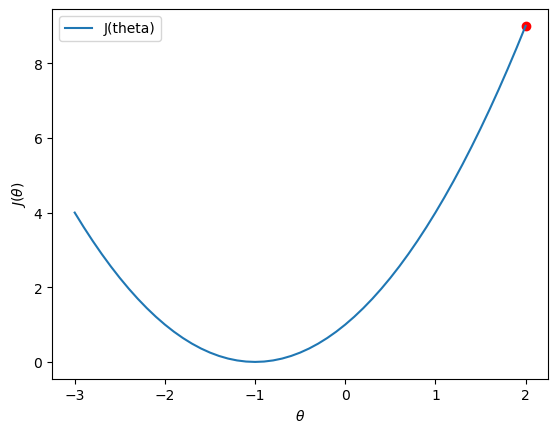

In [24]:
# on trace la fonction J(theta), et l'emplacement du point initial, theta0, 
## dont le cout associé est J(theta)
plt.plot(thetaRange, J(thetaRange), label="J(theta)")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$J(\theta)$")
plt.scatter([theta0], [J(theta0)],color='red')
plt.legend()

$\eta$

In [25]:
theta0 = 2
eta = 0.2  # taux d'apprentissage   ou "pas"  de la descente de gradient
epochMax = 7

$\theta^{i+1} \to \theta^{i} - \eta *  \partial_{\theta} J(\theta^{i})$

In [26]:
def descente_de_gradient_avec_plot(theta0, eta, epochMax):
    theta = theta0 # valeur initiale
    
    ## astuces pour faire un tracé avec dégradé de couleur
    cmap = cm.jet # palettes de couleurs: jet, gist_rainbow, Dark2
    colorMaxNumber = epochMax
    gradient=cmap(np.linspace(0.0,1.0,colorMaxNumber)) # 

    plt.plot(thetaRange, J(thetaRange), label="J(theta)")
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$J(\theta)$")
    plt.scatter([theta0], [J(theta)],color='black')
    for epoch in range(epochMax):
        DeplacementDeTheta = \
        -eta * gradient_de_J_par_rapport_a_son_argument(theta)
        plt.arrow(theta, J(theta), DeplacementDeTheta, 0, width=0.025, length_includes_head=True)
#         theta += DeplacementDeTheta
        theta = theta - eta * gradient_de_J_par_rapport_a_son_argument(theta)
        colorvariable = tuple(gradient[epoch])
        plt.scatter([theta], [J(theta)],color=colorvariable)
    return theta

In [27]:
gradient_de_J_par_rapport_a_son_argument(2-1.2)*0.2

0.7200000000000001

In [28]:
0.8-0.72

0.08000000000000007

In [34]:
0.08 - eta*gradient_de_J_par_rapport_a_son_argument(0.08)

-0.35200000000000004

-0.9160192

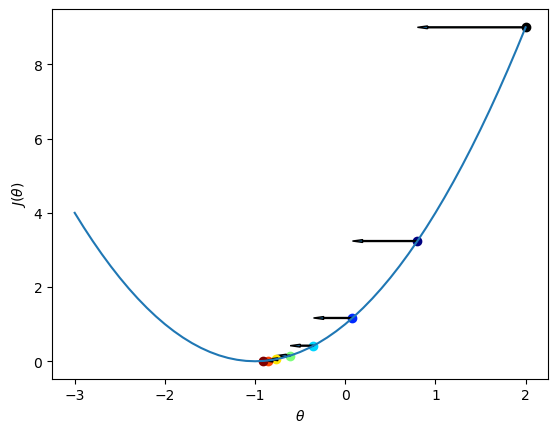

In [29]:
# on part de 2, et on descend efficacmeent vers le minimum, en theta=-1
theta0 = 2
eta = 0.2
epochMax=7
descente_de_gradient_avec_plot(theta0, eta, epochMax)

-1.6291456000000006

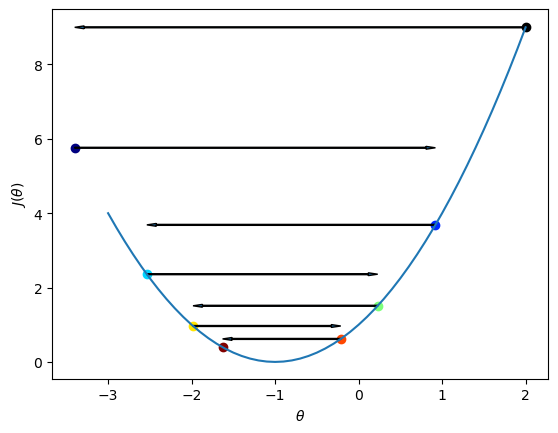

In [35]:
# eta est un peu trop grand, on rebondit mais on finit par converger
theta0 = 2
eta = 0.9
epochMax=7
descente_de_gradient_avec_plot(theta0, eta, epochMax)

-11.74954240000001

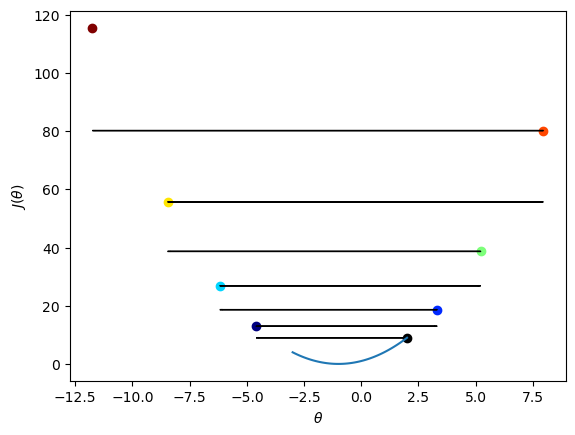

In [36]:
# eta est NETTEMENT trop grand, on rebondit et on diverge
theta0 = 2
eta = 1.1 # taux d'apprentissage 
epochMax = 7
descente_de_gradient_avec_plot(theta0, eta, epochMax)

0.6364529581473116

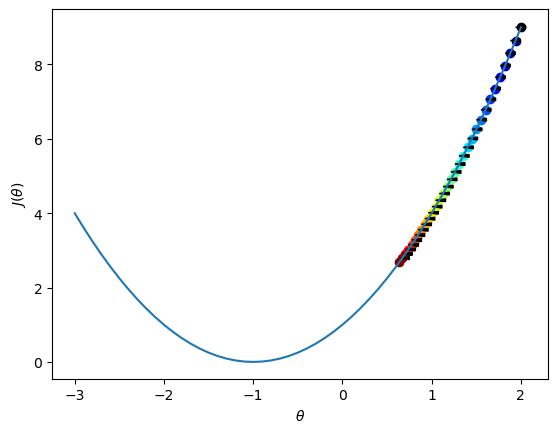

In [39]:
# eta est trop petit, on converge mais trop lentement
theta0 = 2
eta = 0.01 # taux d'apprentissage 
epochMax = 30
descente_de_gradient_avec_plot(theta0, eta, epochMax)

# Descente de Gradient en $D=2$

$J_2(\theta_0 , \theta_1) = \sin\left(\sqrt{ \theta_0^2 + \theta_1^2}\right),  u = \sqrt{ \theta_0^2 + \theta_1^2}$

$ \nabla J = cos(u)/u * (\theta_0, \theta_1)$

In [40]:
# on va minimiser cette fonction J2:
def J2(theta):
    X=theta[0]
    Y=theta[1]
    u = np.sqrt(X**2 + Y**2)
    Jvalue = np.sin(u)
    return Jvalue # ceci est un float

# il faut calculer à la main le gradient de J, et le taper ici:
def gradient_de_J2_par_rapport_a_son_argument(theta):
    u = np.sqrt(theta[0]**2 + theta[1]**2) # =(X**2 + Y**2)^(1/2)
    ## aide: 
    ## du/dX = 1/2 * (X**2 + Y**2)^(1/2-1)*2*X
    ##       = 1 * (1/u)                  *  X
    Jgrad = np.array(\
                     [np.cos(u)*theta[0]/u ,\
                      np.cos(u)*theta[1]/u])
    return Jgrad # ceci est un tableau à D=2 valeurs (entrées, composantes, ...)
    

In [41]:
# inspiré de : https://matplotlib.org/stable/gallery/mplot3d/surface3d.html
def plot_surface(fonction):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    X = np.arange(-1, 5, 0.25)   # joue le role de theta0
    Y = np.arange(-1, 7, 0.25) # joue le role de theta1
    X, Y = np.meshgrid(X, Y) # utile pour les plots 3D
    theta = np.array([X,Y])
    Z = fonction(theta)
    
    # Plot the surface:
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=1, antialiased=False)
    ax.set_zlim(-1.01, 1.01)   # Customize the z axis.
    fig.colorbar(surf, shrink=0.5, aspect=5) # Add a color bar which maps values to colors.
    return fig, ax
#     plt.show()    

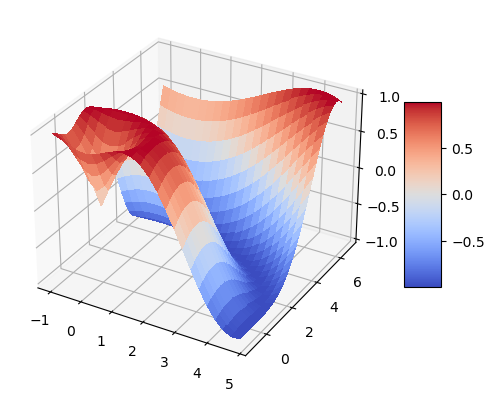

In [42]:
fig, ax = plot_surface(J2)

In [43]:
def plot_niveaux(fonction):
    X = np.arange(-5, 7, 0.25)   # joue le role de theta0
    Y = np.arange(-5, 5, 0.25) # joue le role de theta1
    X, Y = np.meshgrid(X, Y) # utile pour les plots 3D
    theta = np.array([X,Y])
    Z = fonction(theta)
    
    plt.contourf(X,Y,Z, cmap=cm.coolwarm,levels=40)
    return fig, ax    

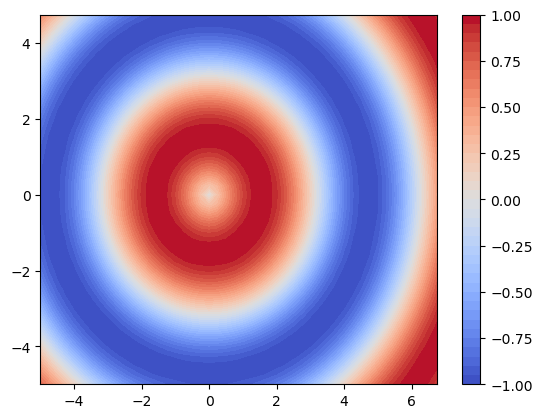

In [45]:
plot_niveaux(J2)
plt.colorbar()

$\vec \theta \to \vec  \theta - \eta \vec \nabla_{\vec \theta} J(\theta,X)$

In [56]:
def descente_de_gradient_avec_plot(theta0, eta, epochMax):
    theta = theta0 # valeur initiale
    valeurs_de_la_fonction_cout = np.zeros(epochMax)
    ## astuces pour faire un tracé avec dégradé de couleur
    cmap = cm.jet # palettes de couleurs: jet, gist_rainbow, Dark2
    colorMaxNumber = epochMax
    gradient=cmap(np.linspace(0.0,1.0,colorMaxNumber)) # 
    
    ## preparation de la figure
    fig, ax = plot_niveaux(J2)
    plt.xlabel(r"$\theta_1$")
    plt.ylabel(r"$\theta_2$")
    
    # la descente de gradient elle meme:
    for epoch in range(epochMax):
        valeurs_de_la_fonction_cout[epoch] = J2(theta)
        DeplacementDeTheta = \
        -eta * gradient_de_J2_par_rapport_a_son_argument(theta) # array D=2 dimensionel 
        ancien_theta = theta.copy() # c'est juste pour les plots
        theta += DeplacementDeTheta  ## ceci est n tableau avec 2 valeurs dedans
        
        # plt.arrow(ancien_theta[0], ancien_theta[1], theta[0], theta[1], width=0.025, length_includes_head=True)
        colorvariable = tuple(gradient[epoch])
        plt.scatter( [theta[0]], [theta[1]] ,color=colorvariable)
        print(J2(theta))
    return valeurs_de_la_fonction_cout

In [51]:
epochMax=10

0.9998069333631268
0.9993031304601308
0.997485616789848
0.9909401934308634
0.9675157074439384
0.885552522891023
0.6206698422633268
-0.03606027975636738
-0.8048856528089182
-0.9948809578615984
-0.9999471800616988
-0.9999994716286015
-0.9999999947162688
-0.9999999999471627
-0.9999999999994716
-0.9999999999999947
-1.0
-1.0
-1.0
-1.0


Text(0, 0.5, 'J(theta(iteration))')

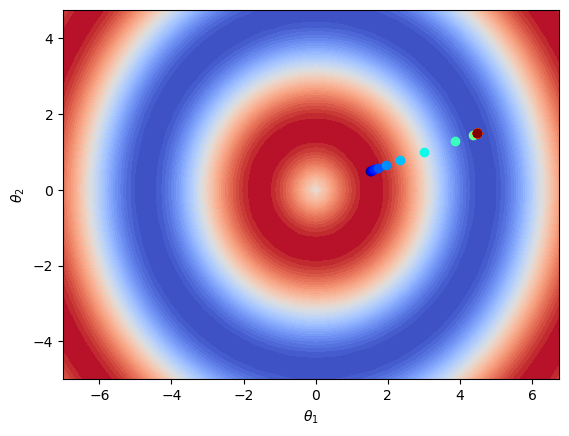

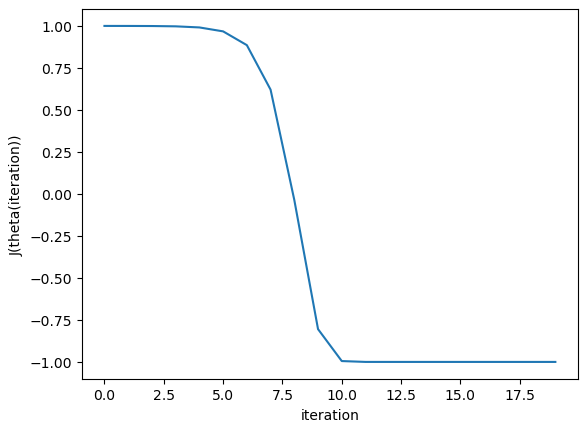

In [61]:
# ici, tout va bien
eta=0.9
epochMax = 20
theta0 = np.array([1.5,0.5])
valeurs_de_la_fonction_cout = descente_de_gradient_avec_plot(theta0, eta, epochMax)
plt.figure()
plt.plot(valeurs_de_la_fonction_cout)
plt.xlabel("iteration")
plt.ylabel("J(theta(iteration))")

0.9994523904554572
0.9943986109958126
0.9432799578129264
0.4811609617940714
-0.9896234940901267
-0.9852576444875333
-0.9791734404965977
-0.9708104315452292
-0.9595332248966583
-0.9447210550092884
-0.9259428304790042
-0.9032174387606285
-0.8772876308045757
-0.849737997801209
-0.8227617831779035
-0.7985543250988929
-0.778625906398265
-0.7634546005461487
-0.7526332385795143
-0.7452918737235262
-0.7404877377607936
-0.7374203775289575
-0.7354933472920111
-0.7342951916154584
-0.7335550647871906
-0.7330997243627091
-0.7328202921233993
-0.7326490754469062
-0.7325442651692858
-0.7324801428313941
-0.7324409270977872
-0.7324169488843265
-0.7324022895080115
-0.7323933280470215
-0.7323878500658678
-0.7323845015756196
-0.7323824548036164
-0.7323812037239633
-0.7323804390127882
-0.7323799715919522
-0.7323796858871287
-0.7323795112540991
-0.7323794045122354
-0.7323793392678842
-0.7323792993882742
-0.7323792750124793
-0.732379260113154
-0.7323792510061734
-0.732379245439674
-0.7323792420372385


Text(0, 0.5, 'J(theta(iteration))')

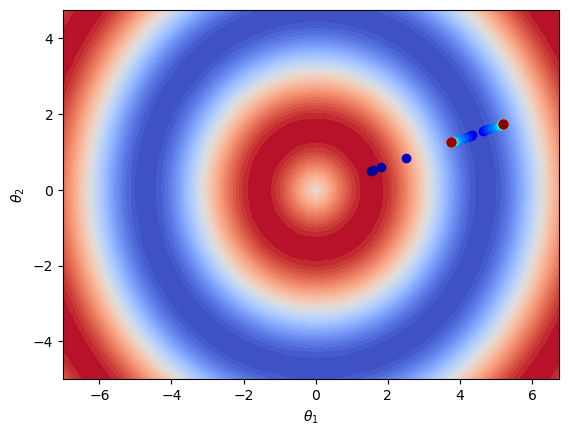

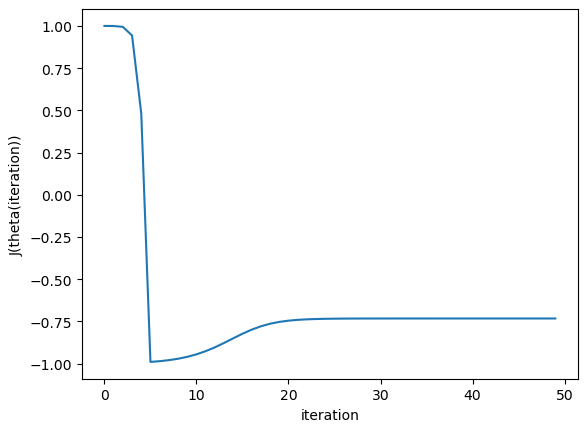

In [63]:
# ici, le taux d'apprentissage \eta est un peu grand: on rebondit un peu contre la paroi d'en face
## mais on descend quand meme a peu près dans le fossé
eta=2.2
epochMax=50
theta0 = np.array([1.5,0.5])
valeurs_de_la_fonction_cout = descente_de_gradient_avec_plot(theta0, eta, epochMax)
plt.figure()
plt.plot(valeurs_de_la_fonction_cout)
plt.xlabel("iteration")
plt.ylabel("J(theta(iteration))")

0.9647071497550364
0.9217876320815713
0.8298388505514791
0.6440779134718899
0.3120379363474039
0.15704469895470058
0.32980616470921176
0.13550791821667438
0.35177070768403385
0.10836782506641524
0.3787769086726666
0.07420136986971804
0.41173035121893975
0.03129573983889661
0.45150758843966426
0.022318740507389356
0.4596089697130631
0.0334879041932268
0.4495177489366335
0.019588442223751473
0.46205799632349176
0.03688114771614018
0.4464287484384197
0.01536011940701335
0.4658370112424763
0.04213254269125359
0.4416267392173183
0.00881144509999766
0.4716570400251227
0.05025681003042889
0.4341461039517407
0.001331061967375716
0.4782566081358325
0.05952321924993878
0.425536841569721
0.012915154844456874
0.4680145853222681
0.04516704220691823
0.4388399925425481
0.005024677701164989
0.4750043625695294
0.05494957840779278
0.42979641859731943
0.007195552244208464
0.4730870319401705
0.05225977555308356
0.43229214996094895
0.003833624182384827
0.4760544627488742
0.05642480899403406


Text(0, 0.5, 'J(theta(iteration))')

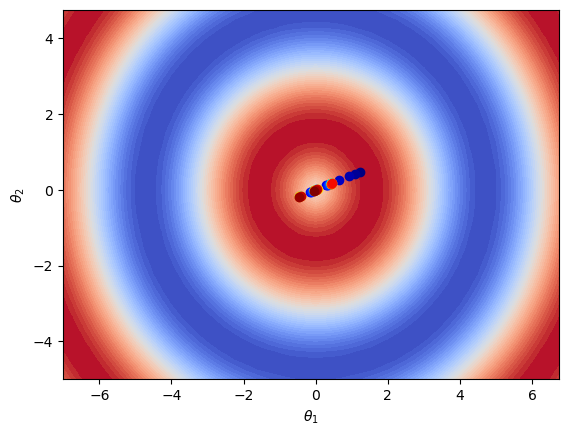

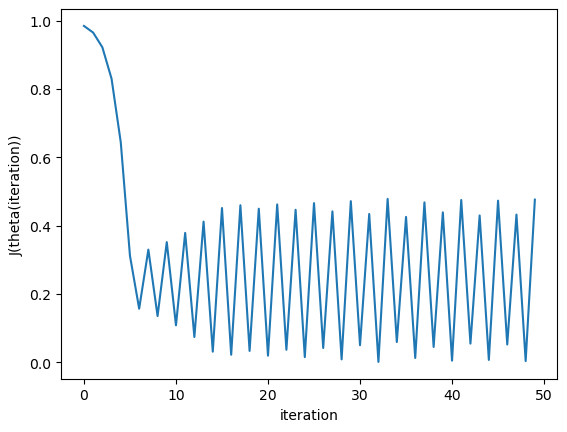

In [65]:
## ici on part d'un point qui est dans le "bassin d'attraction" (c'est le vrai terme mathématique)
## du minimum situé en (0,0)
## eta est assez petit pour qu'on converge à peu près dedans. 
eta=0.5
theta0 = np.array([1.3,0.5])
valeurs_de_la_fonction_cout = descente_de_gradient_avec_plot(theta0, eta, epochMax)
plt.figure()
plt.plot(valeurs_de_la_fonction_cout)
plt.xlabel("iteration")
plt.ylabel("J(theta(iteration))")

0.861795852127275
0.024286499499063096
0.9193682037266674
0.370618780882218
-0.9956877741211985
-0.9957125216078029
-0.9957369861239302
-0.9957611725015058
-0.9957850854629616
-0.9958087296243239
-0.9958321094981942
-0.9958552294966327
-0.995878093933945
-0.9959007070293758
-0.9959230729097158
-0.9959451956118207
-0.9959670790850511
-0.995988727193631
-0.996010143718931
-0.9960313323616796
-0.9960522967441022
-0.9960730404119938
-0.9960935668367252
-0.9961138794171871
-0.9961339814816733
-0.9961538762897051
-0.9961735670338002
-0.9961930568411865
-0.9962123487754632
-0.9962314458382132
-0.9962503509705646
-0.9962690670547062
-0.9962875969153578
-0.9963059433211966
-0.9963241089862404
-0.9963420965711912
-0.9963599086847391
-0.9963775478848271
-0.9963950166798807
-0.9964123175300007
-0.9964294528481223
-0.9964464250011407
-0.9964632363110042
-0.9964798890557774
-0.9964963854706737
-0.996512727749058
-0.9965289180434231
-0.9965449584663375
-0.9965608510913669
-0.9965765979539716


Text(0, 0.5, 'J(theta(iteration))')

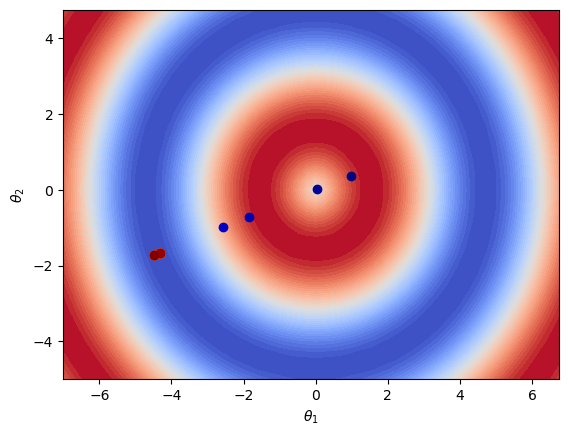

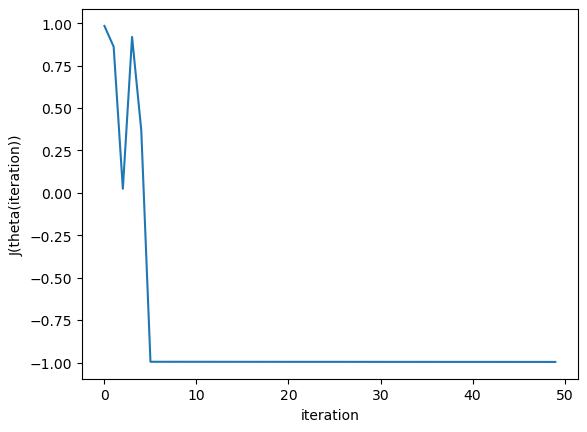

In [66]:
## Et on peut sortir du bassin d'attaction, si eta est assez grand:
eta=2
theta0 = np.array([1.3,0.5])
valeurs_de_la_fonction_cout = descente_de_gradient_avec_plot(theta0, eta, epochMax)
plt.figure()
plt.plot(valeurs_de_la_fonction_cout)
plt.xlabel("iteration")
plt.ylabel("J(theta(iteration))")

#### On re-defini la fonction plot_niveaux pour y voir plus clair

In [54]:
def plot_niveaux(fonction):
    X = np.arange(-7, 7, 0.25)   # joue le role de theta0
    Y = np.arange(-5, 5, 0.25) # joue le role de theta1
    X, Y = np.meshgrid(X, Y) # utile pour les plots 3D
    theta = np.array([X,Y])
    Z = fonction(theta)
    
    plt.contourf(X,Y,Z, cmap=cm.coolwarm,levels=40)
    return fig, ax    

0.861795852127275
0.024286499499063096
0.9193682037266674
0.370618780882218
-0.9956877741211985
-0.9957125216078029
-0.9957369861239302
-0.9957611725015058
-0.9957850854629616
-0.9958087296243239
-0.9958321094981942
-0.9958552294966327
-0.995878093933945
-0.9959007070293758
-0.9959230729097158
-0.9959451956118207
-0.9959670790850511
-0.995988727193631
-0.996010143718931
-0.9960313323616796


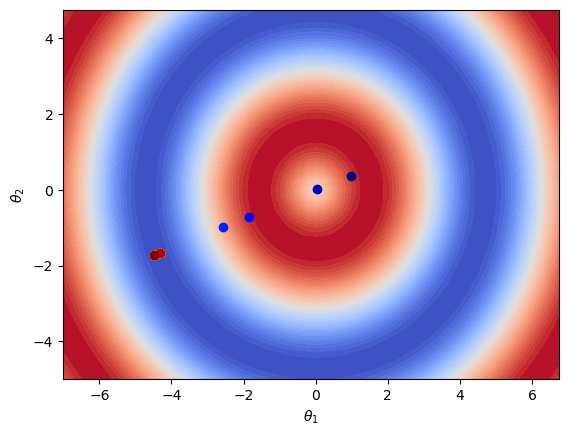

In [55]:
## Et on peut sortir du bassin d'attaction, si eta est assez grand:
eta=2
theta0 = np.array([1.3,0.5])
descente_de_gradient_avec_plot(theta0, eta, epochMax)

## Crédits
### Topo sur la descente de Gradient 
#### fait par François Landes